In [1]:
import sys
sys.path.append("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv")
import torch
import numpy as np
from resnet_model import new_ResNet18
from prepare_data import distributed_cifar10_dataloaders, hetero_distributed_cifar10_dataloaders, mixed_distributed_cifar10_dataloaders_alpha
from training import train_PullSum, train_PullDiag, train_FRSD, train_FROZEN
from useful_functions import *
from new_network_func import *

In [2]:
n = 10
M = 1
batch_size = 128*M
p=0.8

I = np.eye(n)
one = np.ones(n)
R = np.outer(one, one) / n
from network_func import di_ring
A,C=di_ring(n=n)
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A_M)
t = np.diag(1/result)
A=A_M
B=A_M@t
CIFAR10_root = (
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/cifar-10-python/cifar-10-batches-py"
)
trainloader_list, testloader = mixed_distributed_cifar10_dataloaders_alpha(
    n=10, batch_size=batch_size, root=CIFAR10_root, seed=42, alpha=p
)

In [ ]:
lr = 1e-4 
beta = 0.1
epochs = 200
warm_up = False

train_loss_history, test_loss_history, test_accuracy_history = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=new_ResNet18,
    seed_for_model=42,
    epochs=epochs,
    lr=lr,
    trainloader_list=trainloader_list,
    testloader=testloader,
    show_graph=True,
    batch_size=batch_size,
    csv_root=f"/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_multi_gossip_十个节点/Ring1, p={p}, n={n}, lr={lr}, M={M}, batch_size={batch_size}.csv",
    warm_up=warm_up,
)

In [8]:
n = 10
M = 2
batch_size = 128*M
p=0.3

I = np.eye(n)
one = np.ones(n)
R = np.outer(one, one) / n
from network_func import di_ring
A,C=di_ring(n=n)
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A_M)
t = np.diag(1/result)
A=A_M
B=A_M@t
CIFAR10_root = (
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/cifar-10-python/cifar-10-batches-py"
)
trainloader_list, testloader = mixed_distributed_cifar10_dataloaders_alpha(
    n=10, batch_size=batch_size, root=CIFAR10_root, seed=42, alpha=p
)

In [ ]:
lr = 1e-3
beta = 0.1
epochs = 400
warm_up = False

train_loss_history, test_loss_history, test_accuracy_history = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=new_ResNet18,
    seed_for_model=42,
    epochs=epochs,
    lr=lr,
    trainloader_list=trainloader_list,
    testloader=testloader,
    show_graph=True,
    batch_size=batch_size,
    csv_root=f"/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_multi_gossip_十个节点/Ring1, p={p}, n={n}, lr={lr}, M={M}, batch_size={batch_size}.csv",
    warm_up=warm_up,
)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

df1=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_multi_gossip_十个节点/Ring1, p=0.3, n=10, lr=0.001, M=1, batch_size=128.csv")
df2=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_multi_gossip_十个节点/Ring1, p=0.3, n=10, lr=0.002, M=2, batch_size=256.csv")
df3=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_multi_gossip_十个节点/Ring1, p=0.3, n=10, lr=0.001, M=2, batch_size=256.csv")

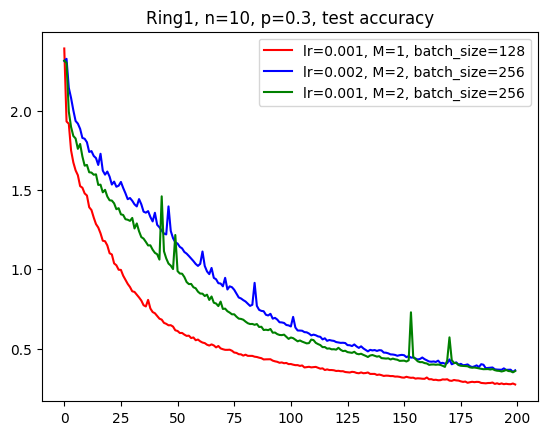

In [7]:
a='Test_Loss'
b=200
plt.plot(df1[a][:b],color='r',label='lr=0.001, M=1, batch_size=128')
plt.plot(df2[a][:b],color='b',label='lr=0.002, M=2, batch_size=256')
plt.plot(df3[a][:b],color='g',label='lr=0.001, M=2, batch_size=256')
plt.legend()
plt.title("Ring1, n=10, p=0.3, test accuracy")
plt.show()

In [28]:
df6=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/数值实验_multi_gossip/Ring1, p=0.5, n=20, lr=0.0015, M=2, batch_size=256.csv")

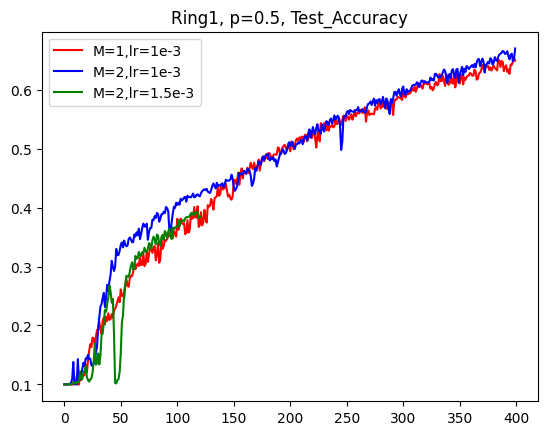

In [32]:
a='Test_Accuracy'
plt.plot(df1[a],color='r',label='M=1,lr=1e-3')
plt.plot(df2[a],color='b',label='M=2,lr=1e-3')
plt.plot(df6[a],color='g',label='M=2,lr=1.5e-3')
""" plt.plot(df3[a],color='g',label='M=5,lr=1e-3')
plt.plot(df4[a],color='orange',label='M=5,lr=1.2e-3')
plt.plot(df5[a],color='cyan',label='M=5,lr=1.5e-3') """
plt.legend()
plt.title("Ring1, p=0.5, Test_Accuracy")
plt.show()